# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

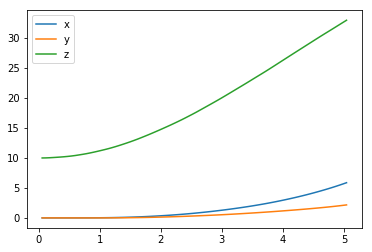

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

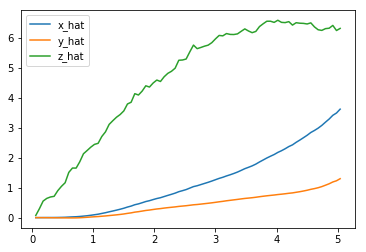

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

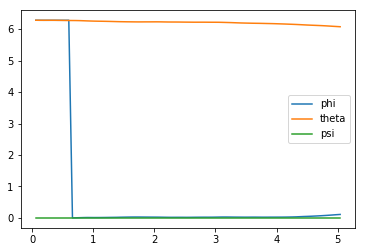

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

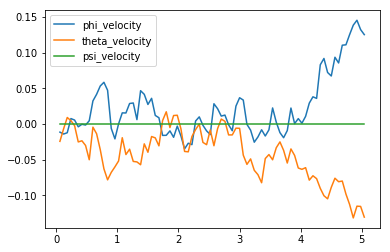

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

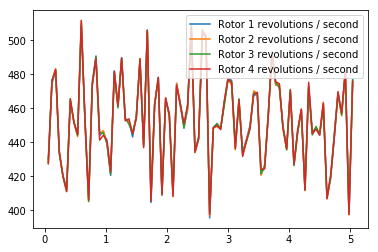

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  5.87307737   2.16699706  32.98993626   0.11033646   6.0765344    0.        ]
[ 3.62328137  1.3002925   6.32063506]
[ 0.12536771 -0.13062859  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.391 (best =   0.101), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
# #Running Hover Task within Jupyter Cell:

# import sys
# import pandas as pd
# import csv
# import numpy as np
# from agents.agent import DDPG
# from HoverTask import Task

# # Modify the values below to give the quadcopter a different starting position.
# runtime = 5.                                     # time limit of the episode
# init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
# init_velocities = np.array([0., 0., 0.])         # initial velocities
# init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
# file_output = 'rewards.txt'                      # file name for saved results

# num_episodes = 1000
# target_pos = np.array([0., 0., 10.])
# task = Task(target_pos=target_pos)
# agent = DDPG(task) 

# results = []

# for i_episode in range(1, num_episodes + 1):
#     state = agent.reset_episode() #Starts New Episode
#     total_reward = 0
#     while True:
#         action = agent.act(state)
#         action = np.clip(action, -1, 1)
#         next_state, reward, done = agent.task.step(action)
#         agent.step(action, reward, next_state, done)
#         total_reward += reward
#         state = next_state
#         if done:
#             print("\rEpisode = {:4d}, Score = {:7.3f}, Position = {:7.3f}, Velocity = {:7.3f}".format(i_episode, total_reward, task.sim.pose[2], task.sim.v[2]), 
#                   end="")
#             break
#     results.append(total_reward)
#     sys.stdout.flush()

In [12]:
import sys
import numpy as np
from HoverTask2 import Task
from agents.agent import DDPG

num_episodes = 1000
task = Task(target_pos=np.array([0.0, 0.0, 10.0])) #Same target position
agent = DDPG(task)

total_scores = []

for i_episode in range(1, num_episodes + 1):
    state = agent.reset_episode()
    agent_score = 0
    while True:
        action = agent.act(state)
        action = np.clip(action, -1, 1) #Clipping here as well
        next_state, reward, done = agent.task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        agent_score += reward
        if done:
            print("\rEpisode = {:4d}, Score = {:7.3f}, Position = {:7.3f}, Velocity = {:7.3f}".format(i_episode, agent_score, task.sim.pose[2], task.sim.v[2]), 
                  end="")
            break
    total_scores.append(agent_score)
    sys.stdout.flush()

Episode = 1000, Score =  84.590, Position =  11.569, Velocity =   1.541

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

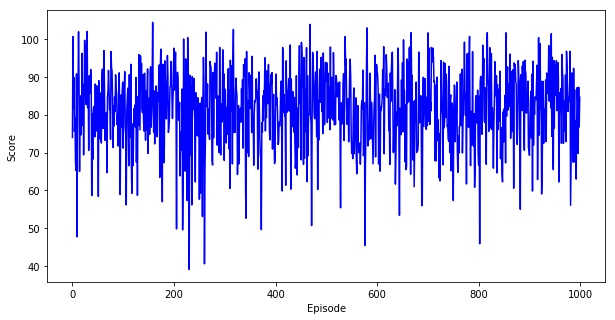

In [17]:
## TODO: Plot the rewards.
'''THESE REWARDS ARE FOR THE HOVER TASK DEFINED ABOVE'''

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5)) #dimensions
plt.legend()
plt.xlabel('Episode') #time is our episodes
plt.ylabel('Score') #score is the resulting rewards
plt.plot(total_scores,  color='b')

plt.show()

In [18]:
# Mean of ALL episodes rewards
total_mean = np.mean(total_scores)
print(total_mean)

81.4986951703


In [19]:
# Mean of the first 10 episodes
early_performance = np.mean(total_scores[:10])
print(early_performance)

77.2401717467


In [20]:
# Mean of the last 10 episodes
final_performance = np.mean(total_scores[-10:])
print(final_performance)

77.5169364588


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**OLD Answer**: I chose to train my quadcopter for the hover task. The task in task.py is the original task from Udacity which was used as a skeleton for the hover task I actually implemented. The implementation of my task is found in the cells directly in this notebook (above). It still calls the Task class defined in task.py which uses the reward function of reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum(). I then focused on tweaking the architecture of the model, but more specifically the hyperparameters (which have effect on the rewards function) to see how the quadcopter would adjust.

**UPDATED Answer**: Again, I continued work on the hover task. The main goal with this was to reduce my focus down to one main goal (one axis of consideration). Clearly from my previous attempt, as well as the commented code, I have experimented in different ways - this definitely came from the complexity of this project. I re-designed some pieces of the reward structure, and changed hyperparameters a bit as you can see below. The reward function included loss & then also involved clipping.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**OLD Answer**: 

- I started with Actor-Critic since it was both most fresh in my memory from the lessons, but it also seemed like it could perform well. I used different layers for the network & in the end I added dense/dropout layers for both the actor & critic, and then I ended up combining the action and states, and using a dense layer with a ReLU activation function.

- For the noise process (using Ornstein-Uhlenbeck), I set the following values: mu = 0, theta = 0.15, sigma = 0.2, gamma = 0.99, and tau = 0.01. When gamma was reduced, the agent would focus more on short term goals, and that resulted in worse performance overall.

- For the Actor Model: This model had 4 hidden layers in it with the max units at 128. It is a keras based model utilizing an adam optimizer again. Additionally, the kernel & activity regularizers remained at 0.01 and the dropout held at 0.5.

- For the Critic Model: Both the state & action pathways had 3 hidden layers. My hidden layers both went up to 128 units, my kernel & activity regularizers stayed the same throughout at 0.01, and again a ReLU activation function was used. On top of this, the dropout layers used a value of 0.5 and the optimizer used was the classic Adam Optimizer. 

-- These model architectures were heavily based off of the Actor-Critic algorithm that we saw in the lessons. --

**UPDATED Notes**:

- My use of the chosen model architecture came from the provided Actor Critic Model, but also took inspiration from previous Udacity lessons that included information on RNNs and GANs. I played around with some tweaks on the architecture side of things - resulting in different setups for Actor & Critic, but decided to focus more energy on the reward function.

- For my hyperparameters, the following changed: I added a lr=0.0001 for the Adam Optimizer (as suggested in my reviewers notes of submission one). I then made slight tweaks of gamma = 0.98 and tau = 0.001

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- I think teaching a quadcopter overall is a hard task. I think that hovering it was an easier task to learn than take-off, but I think that in general, it is hard to narrow down exactly what needs the editing to boost performance of the quadcopter.
- It seems that there was a semi-gradual learning curve, although it still had some fluctuations through much of the middle of the episodes. But, right around the midpoint of episodes (600), you can see the range of rewards drops significantly, and fluctuates MUCH closer to the line y=0.
- I included some summary statistics regarding the rewards plot. As you can see there was serious variations from episodes 100-600. There was also quite a bit of highly negative total rewards in that time frame. The final performance of the agent resulted in mean rewards of -22.75. I was glad to see at least some convergence at the end as we see the rewards plateau.

**ADDITIONAL COMMENTS**:

- Coming from a minimal background in computer science, it was very challenging to navigate this project. It felt like it stretched our learning the most, as well as required serious time commitment due to the code required to be written and also the time needed to run through the model. I think I have come to grasp more of the hover task in isolation, and I have talked with some colleagues about ways we can continue to grow in this realm. Based on my experimentations of implementing the hover task, although it does not identify a super strong reionforcement learning, I do think it showcases how and what I have learned from the project.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- I think it was a mix of getting started & then adjusting the rewards function and figuring out the best tweaks to make in order to improve the performance. This subject (Deep Reinforcement Learning) in itself was much tougher than the previous lessons, so there is definitely not only room to improve, but also time needed to get better in this realm. I think I have a lot more to learn and practice before I could say I am comfortable with the material.
- I think that the idea of teaching and rewarding is really cool, it is just hard to actually implement as someone who is still developing their coding skills. Training takes a long time too, so that made it harder to tweak and see results quickly.

**ADDITIONAL COMMENTS**: 

- Reinforcement learning is hard. Especially when it takes 30+ minutes to run through one iteration of different hyperparameters & tune ups. I struggled with identifying the aspects that could provide the biggest value adding change for the number of iterations I wanted to run since it was time intensive to change, run, repeat.

#### This project was helped by the Udacity student forum discussions, the Actor-Critic algorithm lesson/code, other lesson code provided by Udacity, & some external research online. The RL cheatsheet definitely helped with background on the math involved in these tasks. Thank you!